# Get Dataset

We will use a dataset of [GoodReads' "Best Books Ever"](https://www.kaggle.com/datasets/arnabchaki/goodreads-best-books-ever). I will extract a list of all genres that appear more than 500 times (out of the ~40k books)

## Note

Before running the entire notebook, you must download the `glove.6B.100d.txt` dataset. Simply run `./get_glove.sh`.

In [ ]:
!bash get_glove.sh

--2023-04-22 15:40:33--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2023-04-22 15:40:33--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: ‘glove.6B.100d.txt.gz’

glove.6B.100d.txt.g 100%[===================>] 128.18M   299MB/s    in 0.4s    

2023-04-22 15:40:35 (299 MB/s) - ‘glove.6B.100d.txt.gz’ saved 

In [ ]:
import pandas as pd

# Load csv
df = pd.read_csv('books.csv')

# Remove all rows with language not English
eng_df = df[df['language'] == 'English']

# Remove all rows with description or genres as NaN
eng_df = eng_df.dropna(subset=['description', 'genres'])

# Remove all duplicate descriptions
eng_df = eng_df.drop_duplicates(subset=['description'])

# Reset index
eng_df = eng_df.reset_index(drop=True)

eng_df

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,10-10-2000,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,09-06-2006,10-05-2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42028,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2.94001E+12,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,...,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],0,1,NaN
42029,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,1E+13,"['Mystery', 'Young Adult']",[],Paperback,...,August 5th 2011,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],0,1,NaN
42030,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9.78146E+12,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],Paperback,...,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],0,1,7.37
42031,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9.78145E+12,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],Paperback,...,September 1st 2011,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],0,1,2.86


In [ ]:
# Extract the title, description, and genres columns
cut_df = eng_df[['title', 'description', 'genres']]

# Print the description of the 2nd row
print(cut_df['description'][1])

There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.


In [ ]:
# Iterate through the genres column and add them to the list
genres = []
for genre in cut_df['genres']:
    genres.extend(genre.strip('][').split(', '))

# Remove extra set of single quotes
genres = [genre.replace("'", "") for genre in genres if genre != '']

# Sort genres alphabetically
genres.sort()

# Get unique genres
unique_genres = list(set(genres))

# REMOVE "Fiction"
unique_genres.remove('Fiction')

# Count number of each unique genre
# WARNING: This takes like 20 seconds TT
genre_counts = {genre: genres.count(genre) for genre in unique_genres}


In [ ]:
# Remove all genres that appear less than 500 times
filtered_genre_counts = {genre: count for genre, count in genre_counts.items() if count >= 500}

# Total count of books
total = df.shape[0]

# Sort genres by count
filtered_genre_counts = {k: v/total for k, v in sorted(filtered_genre_counts.items(), key=lambda item: item[1], reverse=True)}
filtered_genre_counts

{'Romance': 0.2583939936735394,
 'Fantasy': 0.25568809786958346,
 'Young Adult': 0.20042684553527193,
 'Contemporary': 0.172510385304318,
 'Adult': 0.1437173672777164,
 'Mystery': 0.13247456076832195,
 'Nonfiction': 0.12824421662410915,
 'Historical Fiction': 0.12555737642440642,
 'Audiobook': 0.12473798544151835,
 'Adventure': 0.11077022752391479,
 'Novels': 0.11006517016654598,
 'Paranormal': 0.10732116315408362,
 'Historical': 0.10615877129463776,
 'Classics': 0.10312893021837723,
 'Science Fiction': 0.09293418194290941,
 'Childrens': 0.08535005145013148,
 'Literature': 0.08060520599108198,
 'Thriller': 0.07723236403826365,
 'Magic': 0.07530774800868936,
 'Humor': 0.06928617706467471,
 'Contemporary Romance': 0.06286443843134266,
 'Crime': 0.06265482678455733,
 'Urban Fantasy': 0.06210221426121422,
 'Suspense': 0.060996989214527994,
 'Science Fiction Fantasy': 0.05878653912115553,
 'Middle Grade': 0.05817675978505278,
 'Chick Lit': 0.057795647699988566,
 'Supernatural': 0.0577765920

## Distribution of top 30 genres

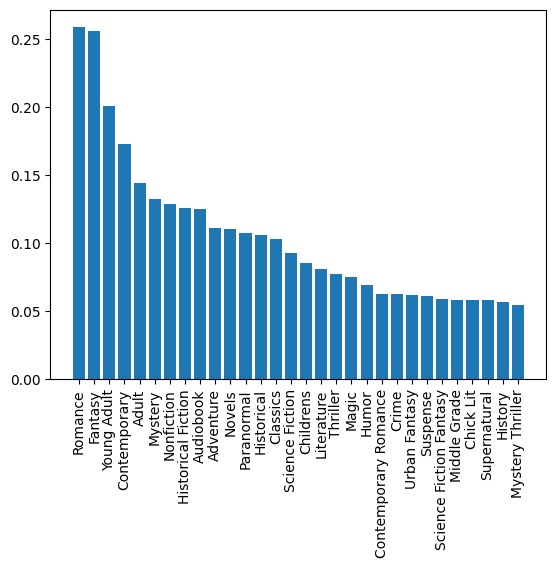

In [ ]:
import matplotlib.pyplot as plt

# Extract first 20 genres
filtered_genre_counts_top = dict(list(filtered_genre_counts.items())[:30])

# Plot the genres as a bar chart
plt.bar(filtered_genre_counts_top.keys(), filtered_genre_counts_top.values())
plt.xticks(rotation=90)
plt.show()

In [ ]:
len(filtered_genre_counts)

127

# Create training data

In [ ]:
# This will be used to map genres to a list of 0s and 1s
genre_set = list(filtered_genre_counts)

def get_genre_arr(field):
    outlist = [0] * len(genre_set)
    for i, genre in enumerate(genre_set):
        if genre in field:
            outlist[i] = 1
    return outlist

# These are the lists that will be used to train the model
# Title list is just used for human debugging
genre_count_list = cut_df['genres'].apply(get_genre_arr)
title_list = cut_df['title']
description_list = cut_df['description']

In [ ]:
genre_df = pd.DataFrame(genre_count_list.tolist(), columns=genre_set)

In [ ]:
genre_df

,Romance,Fantasy,Young Adult,Contemporary,Adult,Mystery,Nonfiction,Historical Fiction,Audiobook,Adventure,...,Love,Anthologies,Faith,Westerns,Ghosts,Magical Realism,Theology,Space Opera,College,Epic
0,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42028,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42029,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42030,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42031,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import re
import unicodedata

pattern = re.compile(r'[^a-zA-Z\s]')

# Clean description
def clean_desc(desc: str):
    # Replace non alphabetic characters with spaces using regex
    desc = pattern.sub(' ', desc)

    # Replace all extra spaces with single spaces
    desc = re.sub('\W+', ' ', desc)

    # Remove leading and trailing spaces
    desc = desc.strip()

    # Convert to lowercase
    desc = desc.lower()

    # Normalize unicode characters
    desc = unicodedata.normalize('NFKD', desc).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    return desc

description_list = description_list.apply(clean_desc)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(description_list, genre_df.values, test_size=0.1, random_state=42)

In [ ]:
# Get the unique words in the descriptions
vocab = set()
description_list.apply(lambda x: vocab.update(x.split(" ")))
vocab.remove('')
vocab = list(vocab)

In [ ]:
vocab.sort()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from keras.layers import LSTM, Embedding
from keras.models import Model
from keras.layers.core import Dense
from keras.layers import Input

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(len(genre_set), activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1000, 100)         10385700  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 127)               16383     
                                                                 
Total params: 10,519,331
Trainable params: 133,631
Non-trainable params: 10,385,700
_________________________________________________________________


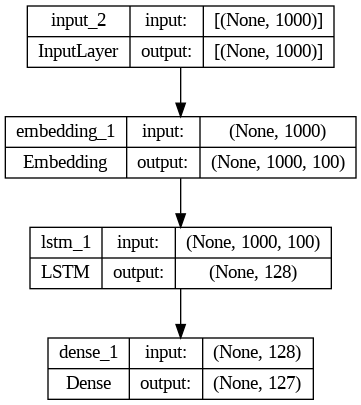

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

Epoch 1/2
237/237 [==============================] - 713s 3s/step - loss: 0.2212 - acc: 0.0336 - val_loss: 0.1881 - val_acc: 0.0321
Epoch 2/2
237/237 [==============================] - 710s 3s/step - loss: 0.1887 - acc: 0.0323 - val_loss: 0.1885 - val_acc: 0.0321


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

132/132 [==============================] - 61s 460ms/step - loss: 0.1902 - acc: 0.0362
Test Score: 0.19024476408958435
Test Accuracy: 0.03615604341030121


In [ ]:
# Convert the predictions to a list of genres
def get_genres_from_prediction(prediction):
    genres = []
    for i, genre in enumerate(genre_set):
        if prediction[i] > 0.4:
            genres.append(genre)
    return genres

# Predict
TEXT = ''
P = model.predict(pad_sequences(tokenizer.texts_to_sequences([clean_desc(TEXT)]), padding='post', maxlen=maxlen))
print(get_genres_from_prediction(P[0]))
print(P[0])

# Get the predictions for the first 10 books in the test set
predictions = model.predict(X_test[0:10])
for i, prediction in enumerate(predictions):
    print(title_list.iloc[i])
    print(get_genres_from_prediction(prediction))
    print()

1/1 [==============================] - 0s 135ms/step
['Adult']
[0.33605823 0.30191395 0.22866361 0.21360056 0.41926804 0.16353963
 0.1766652  0.14330363 0.18137546 0.11371192 0.19966763 0.12950827
 0.17013028 0.15624234 0.12138409 0.08820471 0.21497695 0.10950684
 0.09495632 0.10867362 0.07386114 0.08365641 0.07535788 0.09380054
 0.0566878  0.05640694 0.06773544 0.0835561  0.07361025 0.06997751
 0.05792454 0.06330445 0.06428464 0.06968126 0.06927243 0.06554246
 0.0625001  0.06793436 0.0548686  0.04270452 0.04045228 0.05761433
 0.04142811 0.03914176 0.06459928 0.0456055  0.04904626 0.04195905
 0.07444394 0.03532544 0.04611309 0.03013543 0.045244   0.03667369
 0.04688472 0.03975899 0.03227377 0.031859   0.0401502  0.0262626
 0.03389919 0.02789578 0.0565532  0.02773294 0.0305691  0.02870414
 0.14736068 0.02627006 0.026818   0.02736424 0.02460751 0.02134088
 0.02656917 0.02541051 0.02317808 0.0176956  0.02413111 0.01718615
 0.0211896  0.01754444 0.01987125 0.01583225 0.02115366 0.01871144


# I have decided to start over

The previous genres and descriptions did not have enough correlation to train a good enough model. I am switching to a database of book reviews and their ratings to try to predict ratings through the reviews. It will use similar techniques as above, but on a different dataset. The new dataset is from [Amazon Book Reviews](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews).

I am also downloading the data using the Kaggle API because the dataset is humongous (yikes). But you will need to follow [these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to get an API key.

In [1]:
import json
import os

# Load credentials from kaggle.json
config = {}
with open('kaggle.json', 'r') as f:
    config = json.load(f)

# Set env
os.environ['KAGGLE_USERNAME'] = config['username']
os.environ['KAGGLE_KEY'] = config['key']

In [2]:
!pip install kaggle
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 1.06G/1.06G [00:14<00:00, 103MB/s]
100% 1.06G/1.06G [00:14<00:00, 79.7MB/s]


In [5]:
!unzip -u amazon-books-reviews.zip

Archive:  amazon-books-reviews.zip
  inflating: Books_rating.csv        
  inflating: books_data.csv          


In [6]:
import pandas as pd

# Load data
df = pd.read_csv('Books_rating.csv')
df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [7]:
# Cut dataframe; can change later when finished
# We will use 100000 entries for this example
smol_df = df.iloc[:100000]
smol_df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
99995,B000KEPCVS,April MOrning,NaN,NaN,NaN,1/1,3.0,1130803200,my review for april morning,I somewhat liked april morning. It was a quick...
99996,B000KEPCVS,April MOrning,NaN,NaN,NaN,1/1,3.0,1130803200,My reveiw for april morning,I somewhat liked april morning. It was a quick...
99997,B000KEPCVS,April MOrning,NaN,NaN,NaN,1/1,4.0,1130803200,Hard to Keep up with but very interesting. &lt;3,I enjoyed this book very much. Although it was...
99998,B000KEPCVS,April MOrning,NaN,A3GW18RTWRWGZZ,Errika,1/1,3.0,974851200,The Real Deal On War,"I have read the novel, April Morning, and i fo..."


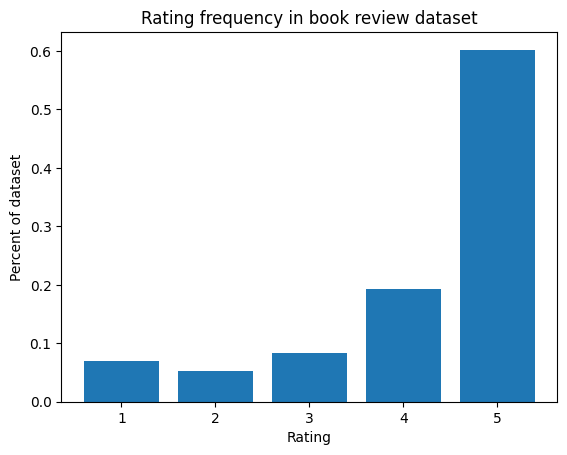

In [8]:
# Plot reviews on bar chart
import matplotlib.pyplot as plt

# Get count of each review score
val_counts = smol_df['review/score'].value_counts()

# Get total # of entries
count = smol_df.shape[0]

val_counts = val_counts.apply(lambda x : x / count)
val_counts = val_counts.sort_index()
# Plot the genres as a bar chart
plt.bar(val_counts.keys(), val_counts)
plt.xlabel('Rating')
plt.ylabel('Percent of dataset')
plt.title('Rating frequency in book review dataset')
plt.show()

The dataset consists of book reviews and the ratings that those reviews correspond to. The model should be able to predict the user's review score (1-5) based on the review text.

In [9]:
# Extract columns that we want and rename columns
in_df = smol_df[['review/score', 'review/text']]
in_df.columns = ['score', 'review']
in_df

,score,review
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...
99995,3.0,I somewhat liked april morning. It was a quick...
99996,3.0,I somewhat liked april morning. It was a quick...
99997,4.0,I enjoyed this book very much. Although it was...
99998,3.0,"I have read the novel, April Morning, and i fo..."


In [10]:
# Count average # of words (approx)
def count_words(text):
    return 

vocab_counts = in_df['review'].apply(lambda text: len(text.split(' ')))
vocab_counts.describe()

count    100000.000000
mean        146.859390
std         165.493393
min           1.000000
25%          49.000000
50%          95.000000
75%         181.000000
max        4928.000000
Name: review, dtype: float64

In [11]:
# Split score array into vectorized array
label_arr = [1.0, 2.0, 3.0, 4.0, 5.0]

score_arr = []
for row in in_df['score']:
    curr_row = [0] * len(label_arr)
    for i, score in enumerate(label_arr):
        if row == score:
            curr_row[i] = 1
    score_arr.append(curr_row)

out_df = pd.DataFrame(score_arr, columns=label_arr)

In [12]:
out_df

,1.0,2.0,3.0,4.0,5.0
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
99995,0,0,1,0,0
99996,0,0,1,0,0
99997,0,0,0,1,0
99998,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(in_df['review'], out_df, test_size=0.1, random_state=42)

In [14]:
from keras.layers import TextVectorization

MAX_LEN = 200
MAX_FEATURES = 5000

# Create text vectorization layer
text_vec = TextVectorization(
    output_sequence_length=MAX_LEN,
    pad_to_max_tokens=True,
    max_tokens=MAX_FEATURES,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
)

In [15]:
# Adapt vectorizer
text_vec.adapt(X_train)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras import Input
import tensorflow as tf

EMBEDDING_OUT = 300

# Create the model
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(text_vec)
model.add(
    Embedding(
        input_dim=MAX_FEATURES,
        input_length=MAX_LEN,
        output_dim=EMBEDDING_OUT
    )
)
model.add(Dropout(0.6))
model.add(LSTM(MAX_LEN,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 200)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 200, 300)          1500000   
                                                                 
 dropout (Dropout)           (None, 200, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 200, 200)          400800    
                                                                 
 lstm_1 (LSTM)               (None, 5)                 4120      
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                      

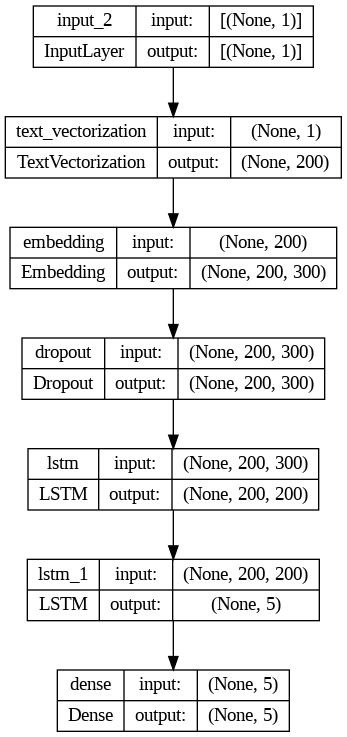

In [19]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

Epoch 1/2
563/563 [==============================] - 1221s 2s/step - loss: 1.1809 - accuracy: 0.5993 - val_loss: 1.1863 - val_accuracy: 0.6027
Epoch 2/2
563/563 [==============================] - 1172s 2s/step - loss: 1.1672 - accuracy: 0.6020 - val_loss: 1.1640 - val_accuracy: 0.6027


In [21]:
# Save model
model.save('review_class')

In [22]:
!zip -r review_class.zip review_class

  adding: review_class/ (stored 0%)
  adding: review_class/keras_metadata.pb (deflated 89%)
  adding: review_class/variables/ (stored 0%)
  adding: review_class/variables/variables.index (deflated 59%)
  adding: review_class/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: review_class/saved_model.pb (deflated 88%)
  adding: review_class/assets/ (stored 0%)
  adding: review_class/fingerprint.pb (stored 0%)


In [ ]:
from keras.models import load_model

# Load model
model = load_model('review_class')

In [23]:
# Test model
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 75s 238ms/step - loss: 1.1659 - accuracy: 0.6022
Test Score: 1.1658990383148193
Test Accuracy: 0.6021999716758728


In [30]:
# Test random review
TEST_INPUT = "The \"Dragon\" book makes any bookshelf look more beautiful, and is great for photo shoots and job applications."
model.predict([TEST_INPUT])

1/1 [==============================] - 0s 136ms/step


array([[0.06691363, 0.04487224, 0.08195179, 0.18375634, 0.622506  ]],
      dtype=float32)

# Write up your analysis of the performance of various approaches

The first attempt to build a model resulted in complete failure! I used the "GoodReads Best Books" dataset, which contained a list of genres and descriptions of the books. My first attempt at making a bot was bad. I used the GoodReads Best Book dataset and tried to use the description to do multiclass classification of genres. However, the correlation of the description and genres was not high enough, so the model always gave me the highest frequency genre. I initially had a model that performed decently, but I realized that my accuracy measurement was wrong! After that, I used the Glove dataset to create embeddings, but it was huge and slowed down the process. My second attempt went much better. I used the Amazon Book Reviews dataset and created a model to predict the rating (classify into 1-5) that the user gave based on their review body. At first, I used only a sequential model but quickly realized that I needed a RNN to be more accurate. I added a Dropout layer and 2 LSTM layers which fed into a Dense output layer.

The use of the Amazon Book Reviews dataset was a better choice since it resulted in a higher correlation between the review body and the rating given by the user. Additionally, the use of an RNN with 2 LSTM layers and a Dense output layer with a Dropout layer is a more sophisticated approach than the simple sequential model used initially. This indicates that the use of a more complex model can lead to better results, but this can come at a cost of increased computation time.

The use of the Glove dataset to create embeddings in the first attempt was not ideal, as it was too large and slowed down the process. It's important to use appropriate datasets that are both relevant to the task at hand and manageable in size. In the second attempt, the Amazon Book Reviews dataset was a better choice, as it was more focused on the task of predicting ratings.

The success of the second attempt indicates that using a more complex model and an appropriate dataset can lead to better results. However, it's also important to balance complexity with efficiency, as overly complex models can be computationally expensive and time-consuming to train. I faced a lot of issues in both memory and time. I started running out of memory even in Google Colab, and I started running out of TIME as the models took more than 30 minutes to train.